## (Momentum and NAG)

 develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

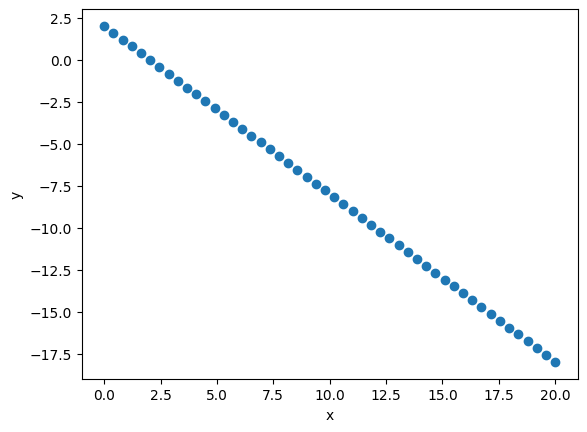

In [4]:
plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [8]:
def GD(x, y, alpha, max_iter):
    i = 0
    theta_0 = 0
    theta_1 = 0
    costList = []
    theta_0_lst = []
    theta_1_lst = []
    m = len(y)

    while i < max_iter:
        h = x * theta_1 + theta_0
        error_vector = h - y
        cost = (1 / (2 * m)) * np.sum(error_vector ** 2)

        # Compute gradients
        gradient_0 = np.sum(error_vector) / m
        gradient_1 = np.sum(error_vector * x) / m

        # Update parameters
        theta_0_new = theta_0 - alpha * gradient_0
        theta_1_new = theta_1 - alpha * gradient_1

        # Logging formatted output
        print(f"\n****************** Iteration {i} ********************\n")
        print(f"h(x):\n{h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"j = {cost}\n")
        print(f"Gradient Vector:\n[[ {gradient_0} ]\n [ {gradient_1} ]]\n")
        print(f"Gradient Vector Norm:\n{(gradient_0**2 + gradient_1**2)**0.5}\n")
        print(f"theta_0_new : {theta_0_new}")
        print(f"theta_1_new : {theta_1_new}")

        # Stop condition
        if (gradient_0 ** 2 + gradient_1 ** 2) ** 0.5 < 0.05:
            break

        # Update variables
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
        costList.append(cost)

        i += 1

    return theta_0_lst, theta_1_lst, h, costList

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [9]:
theta_0_lst, theta_1_lst, h, costList = GD(X, y, 0.0005, 300)

Streaming output truncated to the last 5000 lines.

theta_0_new : -0.017241120224307672
theta_1_new : -0.8499457750679505

****************** Iteration 175 ********************

h(x):
[ -0.01724112  -0.36415776  -0.71107441  -1.05799105  -1.40490769
  -1.75182433  -2.09874098  -2.44565762  -2.79257426  -3.13949091
  -3.48640755  -3.83332419  -4.18024083  -4.52715748  -4.87407412
  -5.22099076  -5.56790741  -5.91482405  -6.26174069  -6.60865734
  -6.95557398  -7.30249062  -7.64940726  -7.99632391  -8.34324055
  -8.69015719  -9.03707384  -9.38399048  -9.73090712 -10.07782376
 -10.42474041 -10.77165705 -11.11857369 -11.46549034 -11.81240698
 -12.15932362 -12.50624026 -12.85315691 -13.20007355 -13.54699019
 -13.89390684 -14.24082348 -14.58774012 -14.93465676 -15.28157341
 -15.62849005 -15.97540669 -16.32232334 -16.66923998 -17.01615662]

Error Vector:
[-2.01724112 -1.9559945  -1.89474788 -1.83350125 -1.77225463 -1.71100801
 -1.64976139 -1.58851476 -1.52726814 -1.46602152 -1.4047749  -1.343

In [11]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[ 1.47996392e-02 -3.33091413e-01 -6.80982466e-01 -1.02887352e+00
 -1.37676457e+00 -1.72465562e+00 -2.07254668e+00 -2.42043773e+00
 -2.76832878e+00 -3.11621983e+00 -3.46411089e+00 -3.81200194e+00
 -4.15989299e+00 -4.50778404e+00 -4.85567510e+00 -5.20356615e+00
 -5.55145720e+00 -5.89934825e+00 -6.24723931e+00 -6.59513036e+00
 -6.94302141e+00 -7.29091246e+00 -7.63880352e+00 -7.98669457e+00
 -8.33458562e+00 -8.68247667e+00 -9.03036773e+00 -9.37825878e+00
 -9.72614983e+00 -1.00740409e+01 -1.04219319e+01 -1.07698230e+01
 -1.11177140e+01 -1.14656051e+01 -1.18134961e+01 -1.21613872e+01
 -1.25092783e+01 -1.28571693e+01 -1.32050604e+01 -1.35529514e+01
 -1.39008425e+01 -1.42487335e+01 -1.45966246e+01 -1.49445156e+01
 -1.52924067e+01 -1.56402977e+01 -1.59881888e+01 -1.63360798e+01
 -1.66839709e+01 -1.70318619e+01]


In [12]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9707406024215084

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

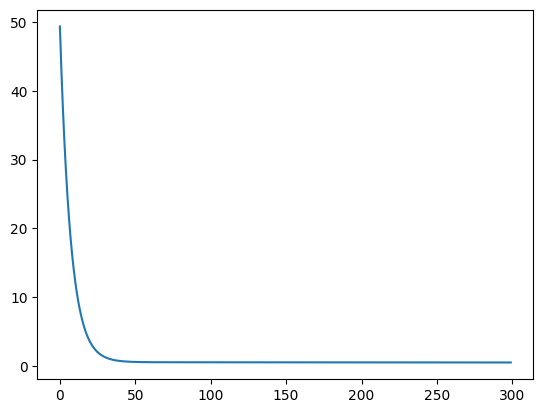

In [13]:
plt.plot(costList)

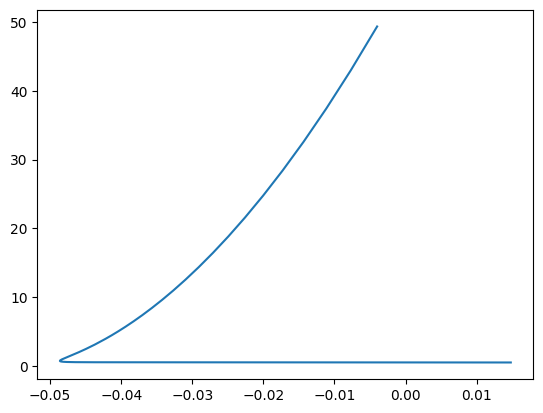

In [14]:
plt.plot(theta_0_lst,costList)
plt.show()

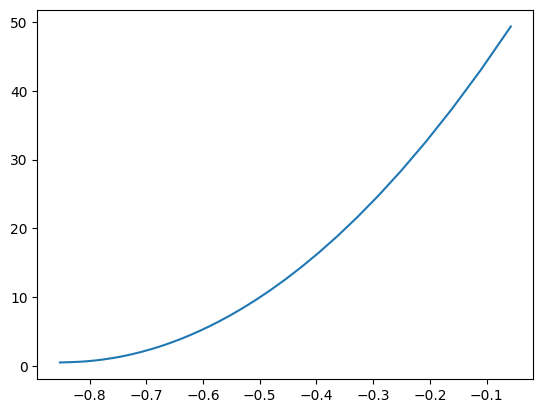

In [15]:
plt.plot(theta_1_lst,costList)
plt.show()

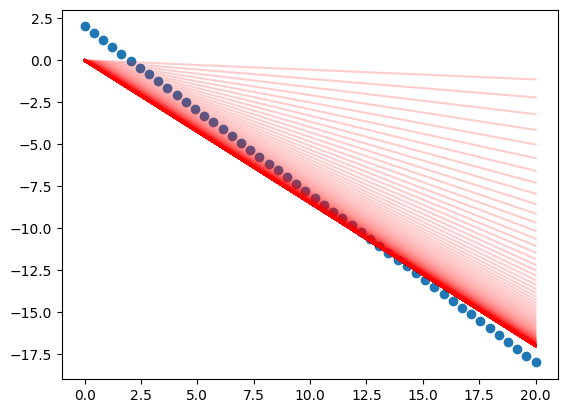

In [17]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

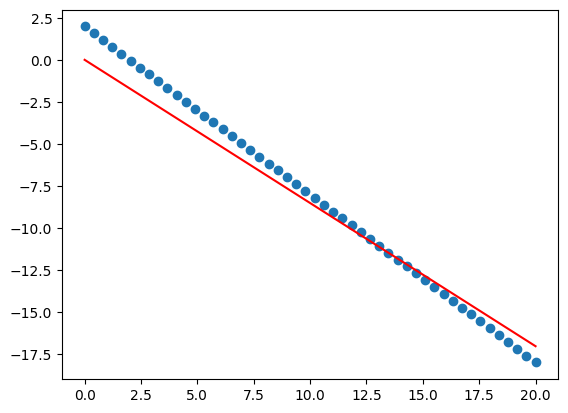

In [19]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="r")
plt.show()

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [37]:
def momentum_GD(x, y, alpha, max_iter, gamma):
    i = 0
    theta_0 = 0
    theta_1 = 0
    vt0 = 0
    vt1 = 0

    costList2 = []
    theta_0_lst = []
    theta_1_lst = []
    m = len(y)

    while i < max_iter:
        h = x * theta_1 + theta_0
        error_vector = h - y
        cost = (1 / (2 * m)) * np.sum(error_vector ** 2)

        # Compute gradients
        gradient_0 = np.sum(error_vector) / m
        gradient_1 = np.sum(error_vector * x) / m

        # Update momentum terms
        vt0 = gamma * vt0 + alpha * gradient_0
        vt1 = gamma * vt1 + alpha * gradient_1

        # Update parameters
        theta_0_new = theta_0 - vt0
        theta_1_new = theta_1 - vt1

        # Logging formatted output
        print(f"\n****************** Iteration {i} ********************\n")
        print(f"h(x):\n{h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"j = {cost}\n")
        print(f"Gradient Vector:\n[[ {gradient_0} ]\n [ {gradient_1} ]]\n")
        print(f"Gradient Vector Norm:\n{(gradient_0**2 + gradient_1**2)**0.5}\n")
        print(f"v_0 : {vt0}")
        print(f"v_1 : {vt1}")
        print(f"theta_0_new : {theta_0_new}")
        print(f"theta_1_new : {theta_1_new}")

        # Stop condition
        if (gradient_0 ** 2 + gradient_1 ** 2) ** 0.5 < 0.05:
            break

        # Update variables
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
        costList2.append(cost)

        i += 1

    return theta_0_lst, theta_1_lst, h, costList2

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [39]:
theta_0_lst, theta_1_lst, h, costList2 = momentum_GD(X, y, 0.0005, 300, 0.5)
costList2[-1]


Streaming output truncated to the last 5000 lines.

Gradient Vector Norm:
0.5073230735764087

v_0 : -0.0005060550692514087
v_1 : 3.764234343865569e-05
theta_0_new : 0.02547813116341172
theta_1_new : -0.8531273870680849

****************** Iteration 172 ********************

h(x):
[  0.02547813  -0.32273713  -0.67095239  -1.01916765  -1.36738291
  -1.71559817  -2.06381343  -2.41202869  -2.76024395  -3.10845921
  -3.45667447  -3.80488973  -4.15310499  -4.50132025  -4.84953551
  -5.19775077  -5.54596603  -5.89418129  -6.24239655  -6.59061181
  -6.93882707  -7.28704233  -7.63525759  -7.98347285  -8.33168811
  -8.67990337  -9.02811863  -9.37633389  -9.72454915 -10.07276441
 -10.42097967 -10.76919493 -11.11741019 -11.46562545 -11.81384071
 -12.16205597 -12.51027123 -12.85848649 -13.20670175 -13.55491701
 -13.90313227 -14.25134753 -14.59956279 -14.94777805 -15.29599331
 -15.64420857 -15.99242383 -16.34063909 -16.68885435 -17.03706961]

Error Vector:
[-1.97452187 -1.91457386 -1.85462586 -1.794

0.47047356634456544

In [40]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[  0.08919419  -0.26095554  -0.61110527  -0.961255    -1.31140473
  -1.66155446  -2.01170419  -2.36185391  -2.71200364  -3.06215337
  -3.4123031   -3.76245283  -4.11260256  -4.46275229  -4.81290201
  -5.16305174  -5.51320147  -5.8633512   -6.21350093  -6.56365066
  -6.91380039  -7.26395011  -7.61409984  -7.96424957  -8.3143993
  -8.66454903  -9.01469876  -9.36484848  -9.71499821 -10.06514794
 -10.41529767 -10.7654474  -11.11559713 -11.46574686 -11.81589658
 -12.16604631 -12.51619604 -12.86634577 -13.2164955  -13.56664523
 -13.91679496 -14.26694468 -14.61709441 -14.96724414 -15.31739387
 -15.6675436  -16.01769333 -16.36784306 -16.71799278 -17.06814251]


In [41]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.972892479332971

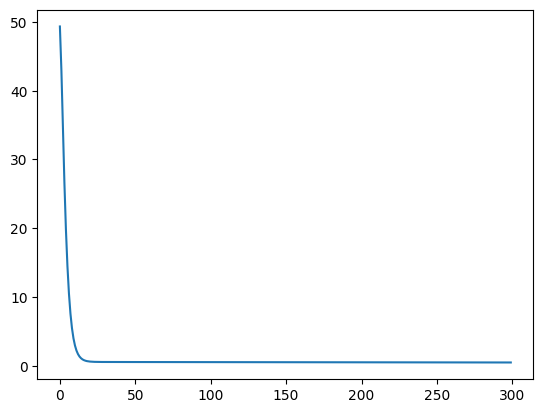

In [42]:
plt.plot(costList2)
plt.show()

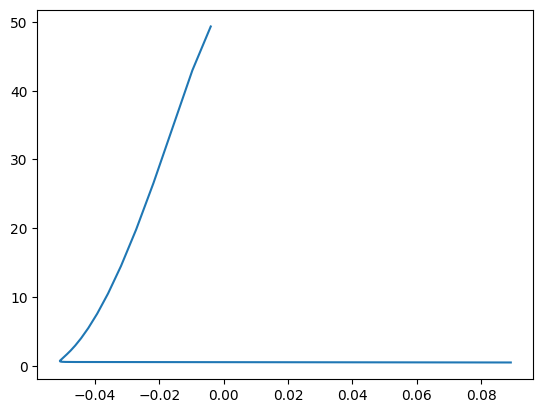

In [43]:
plt.plot(theta_0_lst,costList2)
plt.show()

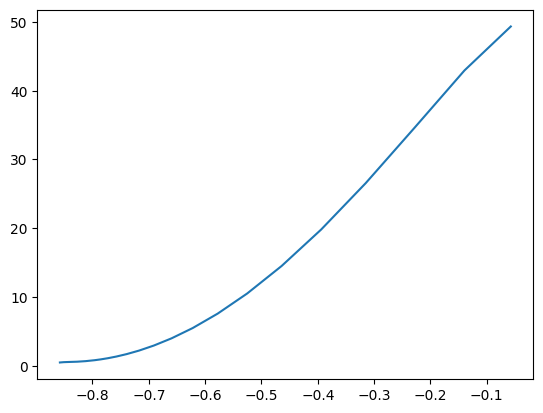

In [45]:
plt.plot(theta_1_lst,costList2)
plt.show()

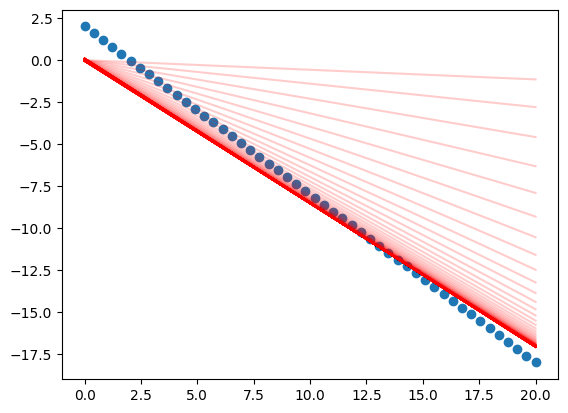

In [47]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

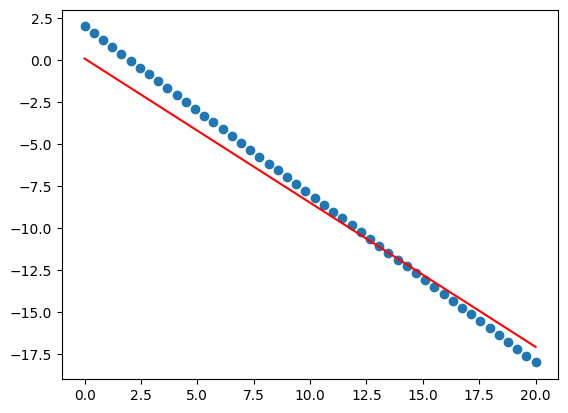

In [48]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [60]:
def momentum_GD(x, y, alpha, max_iter, gamma):
    i = 0
    theta_0 = 0
    theta_1 = 0
    vt0 = 0
    vt1 = 0

    costList = []
    theta_0_lst = []
    theta_1_lst = []
    m = len(y)

    np.set_printoptions(precision=8, suppress=True)  # Format numbers properly

    while i < max_iter:
        h = x * theta_1 + theta_0
        error_vector = h - y
        cost = (1 / (2 * m)) * np.sum(error_vector ** 2)

        # Compute gradients
        gradient_0 = np.sum(error_vector) / m
        gradient_1 = np.sum(error_vector * x) / m

        # Update momentum terms
        vt0 = gamma * vt0 + alpha * gradient_0
        vt1 = gamma * vt1 + alpha * gradient_1

        # Update parameters
        theta_0_new = theta_0 - vt0
        theta_1_new = theta_1 - vt1

        # Logging formatted output
        print(f"\n***************** Iteration {i} ********************\n")
        print(f"h(x):\n{h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"Cost Function J = {cost}\n")
        print(f"Gradient Vector:\n[[ {gradient_0} ]\n [ {gradient_1} ]]\n")
        print(f"Gradient Vector Norm:\n{(gradient_0**2 + gradient_1**2)**0.5}\n")
        print(f"v_0 : {vt0}")
        print(f"v_1 : {vt1}")
        print(f"theta_0_new : {theta_0_new}")
        print(f"theta_1_new : {theta_1_new}")

        # Stop condition
        if (gradient_0 ** 2 + gradient_1 ** 2) ** 0.5 < 0.05:
            break

        # Update variables
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
        costList.append(cost)

        i += 1

    return theta_0_lst, theta_1_lst, h, costList

In [61]:
theta_0_lst , theta_1_lst , h , costList= momentum_GD(X, y, 0.0005,1000,0.9)
costList[-1]

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm:
0.17331631610413384

v_0 : -0.0008744059371503781
v_1 : 6.504171302397587e-05
theta_0_new : 1.3261474285870836
theta_1_new : -0.9498762260087753

***************** Iteration 872 ********************

h(x):
[  1.32614743   0.93844285   0.55073826   0.16303368  -0.2246709
  -0.61237548  -1.00008006  -1.38778465  -1.77548923  -2.16319381
  -2.55089839  -2.93860297  -3.32630756  -3.71401214  -4.10171672
  -4.4894213   -4.87712588  -5.26483047  -5.65253505  -6.04023963
  -6.42794421  -6.81564879  -7.20335338  -7.59105796  -7.97876254
  -8.36646712  -8.7541717   -9.14187629  -9.52958087  -9.91728545
 -10.30499003 -10.69269461 -11.0803992  -11.46810378 -11.85580836
 -12.24351294 -12.63121753 -13.01892211 -13.40662669 -13.79433127
 -14.18203585 -14.56974044 -14.95744502 -15.3451496  -15.73285418
 -16.12055876 -16.50826335 -16.89596793 -17.28367251 -17.67137709]

Error Vector:
[-0.67385257 -0.65339389 -0.6329352  -0.61247

0.04206882528854676

In [62]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[  1.42920884   1.03837523   0.64754163   0.25670802  -0.13412559
  -0.52495919  -0.9157928   -1.3066264   -1.69746001  -2.08829361
  -2.47912722  -2.86996083  -3.26079443  -3.65162804  -4.04246164
  -4.43329525  -4.82412886  -5.21496246  -5.60579607  -5.99662967
  -6.38746328  -6.77829688  -7.16913049  -7.5599641   -7.9507977
  -8.34163131  -8.73246491  -9.12329852  -9.51413213  -9.90496573
 -10.29579934 -10.68663294 -11.07746655 -11.46830015 -11.85913376
 -12.24996737 -12.64080097 -13.03163458 -13.42246818 -13.81330179
 -14.2041354  -14.594969   -14.98580261 -15.37663621 -15.76746982
 -16.15830342 -16.54913703 -16.93997064 -17.33080424 -17.72163785]


In [63]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9975811375652239

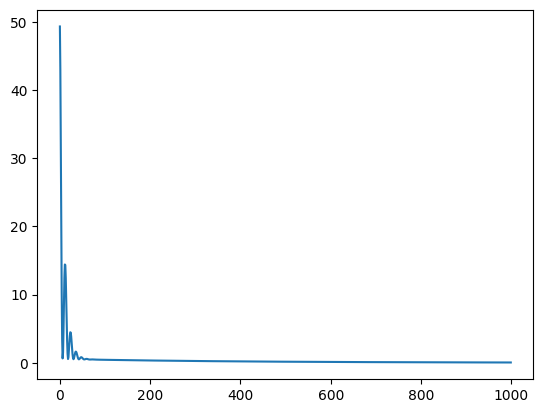

In [64]:
plt.plot(costList)
plt.show()

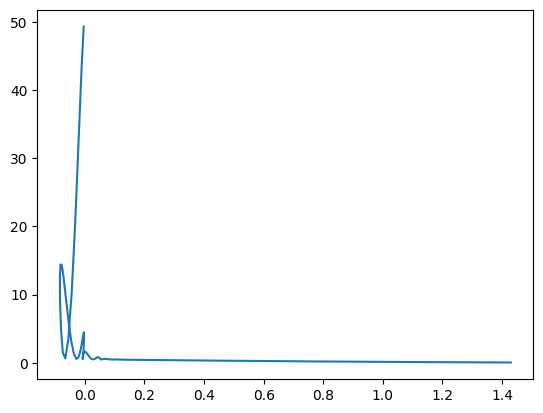

In [65]:
plt.plot(theta_0_lst,costList)
plt.show()

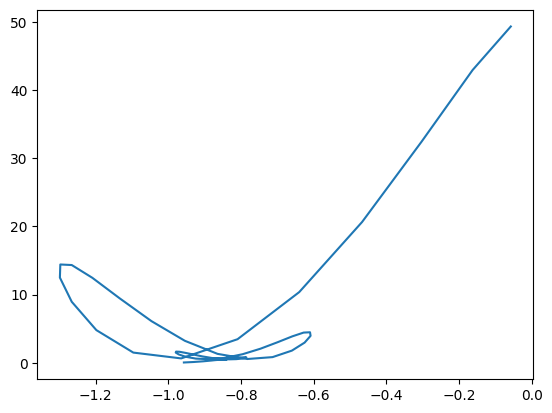

In [66]:
plt.plot(theta_1_lst,costList)
plt.show()

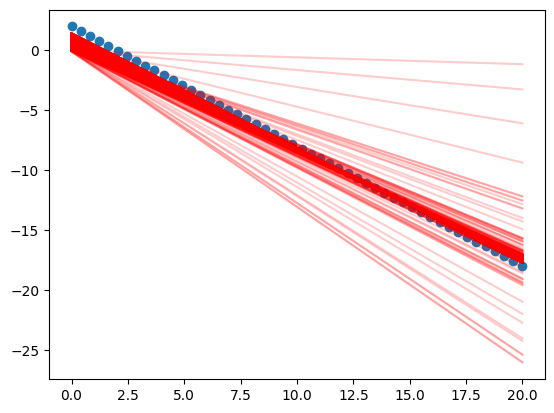

In [67]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

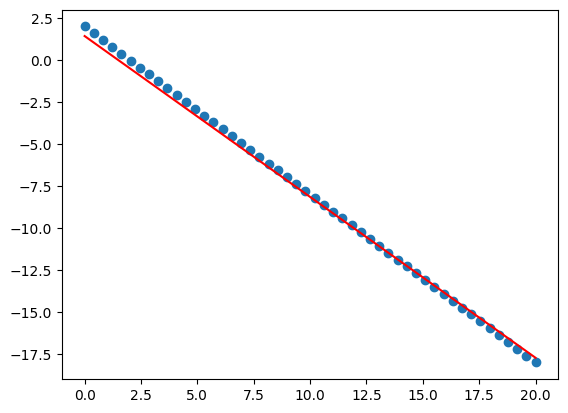

In [68]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [69]:
theta_0_lst , theta_1_lst , h , costList= momentum_GD(X, y, 0.0005,300,0.89)
costList[-1]

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm:
0.43759053688819516

v_0 : -0.0020018607880177945
v_1 : 0.00015835587131090285
theta_0_new : 0.2985141450223985
theta_1_new : -0.8734176508980079

***************** Iteration 172 ********************

h(x):
[  0.29851415  -0.05798286  -0.41447986  -0.77097686  -1.12747386
  -1.48397086  -1.84046786  -2.19696486  -2.55346186  -2.90995886
  -3.26645586  -3.62295286  -3.97944986  -4.33594686  -4.69244386
  -5.04894086  -5.40543786  -5.76193486  -6.11843186  -6.47492886
  -6.83142586  -7.18792286  -7.54441986  -7.90091686  -8.25741386
  -8.61391086  -8.97040786  -9.32690486  -9.68340187 -10.03989887
 -10.39639587 -10.75289287 -11.10938987 -11.46588687 -11.82238387
 -12.17888087 -12.53537787 -12.89187487 -13.24837187 -13.60486887
 -13.96136587 -14.31786287 -14.67435987 -15.03085687 -15.38735387
 -15.74385087 -16.10034787 -16.45684487 -16.81334187 -17.16983887]

Error Vector:
[-1.70148585 -1.64981959 -1.59815333 -1.546

0.2765561740251075

In [70]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[  0.53633708   0.17261174  -0.1911136   -0.55483894  -0.91856428
  -1.28228962  -1.64601496  -2.0097403   -2.37346564  -2.73719098
  -3.10091632  -3.46464166  -3.828367    -4.19209234  -4.55581768
  -4.91954302  -5.28326836  -5.64699371  -6.01071905  -6.37444439
  -6.73816973  -7.10189507  -7.46562041  -7.82934575  -8.19307109
  -8.55679643  -8.92052177  -9.28424711  -9.64797245 -10.01169779
 -10.37542313 -10.73914847 -11.10287381 -11.46659915 -11.83032449
 -12.19404983 -12.55777517 -12.92150051 -13.28522585 -13.64895119
 -14.01267653 -14.37640187 -14.74012721 -15.10385255 -15.46757789
 -15.83130323 -16.19502857 -16.55875391 -16.92247925 -17.28620459]


In [71]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9840948111189305

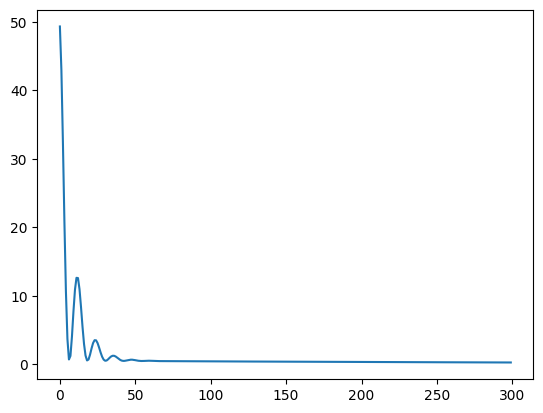

In [72]:
plt.plot(costList)
plt.show()

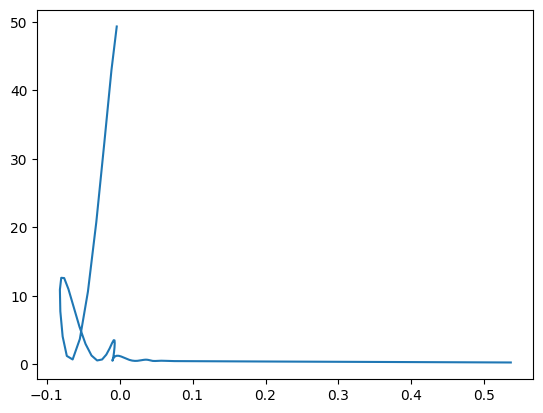

In [73]:
plt.plot(theta_0_lst,costList)
plt.show()

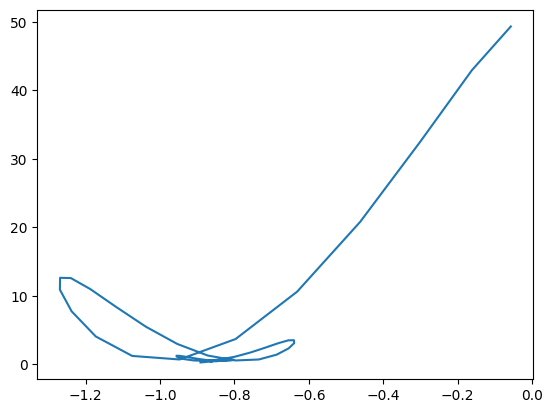

In [74]:
plt.plot(theta_1_lst,costList)
plt.show()

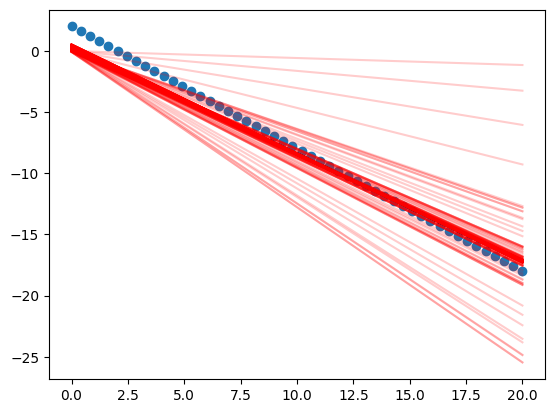

In [76]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

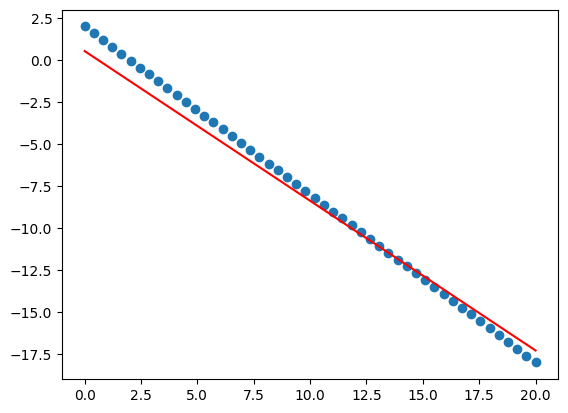

In [77]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [78]:

def NGD(x, y, alpha, max_iter, gamma):
    i = 0
    theta_0 = 0
    theta_1 = 0
    vt0 = 0
    vt1 = 0
    m = len(y)

    costList = []
    theta_0_lst = []
    theta_1_lst = []

    np.set_printoptions(precision=8, suppress=True)  # Formatting numbers

    while i < max_iter:
        # Compute temporary theta values
        theta_0_temp = theta_0 - gamma * vt0
        theta_1_temp = theta_1 - gamma * vt1

        # Hypothesis function
        h = theta_0_temp + theta_1_temp * x

        # Error vector
        error_vector = h - y

        # Compute gradients
        gradient_0 = np.sum(error_vector) / m
        gradient_1 = np.sum(error_vector * x) / m

        # Update momentum terms
        vt0 = gamma * vt0 + alpha * gradient_0
        vt1 = gamma * vt1 + alpha * gradient_1

        # Update theta values
        theta_0_new = theta_0 - vt0
        theta_1_new = theta_1 - vt1

        # Compute cost function
        cost = (1 / (2 * m)) * np.sum(error_vector ** 2)

        # Logging formatted output
        print(f"\n****************** Iteration {i} ********************\n")
        print(f"h(x):\n{h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"j = {cost}\n")
        print(f"Gradient Vector:\n[[ {gradient_0} ]\n [ {gradient_1} ]]\n")
        print(f"Gradient Vector Norm:\n{(gradient_0**2 + gradient_1**2)**0.5}\n")
        print(f"theta_0_new : {theta_0_new}")
        print(f"theta_1_new : {theta_1_new}")
        print(f"v_0 : {vt0}")
        print(f"v_1 : {vt1}")

        # Stop condition
        if (gradient_0 ** 2 + gradient_1 ** 2)**0.5 < 0.05:
            break

        # Update variables
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
        costList.append(cost)

        i += 1

    return theta_0_lst, theta_1_lst, h, costList

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [79]:
theta_0_lst, theta_1_lst, h, costList = NGD(X, y, 0.0005, 300, 0.9)

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm:
0.42920294998385555

theta_0_new : 0.3293107066487666
theta_1_new : -0.8757273980848634
v_0 : -0.002165358800954498
v_1 : 0.00016109485775469317

****************** Iteration 172 ********************

h(x):
[  0.33125953  -0.0262394   -0.38373833  -0.74123727  -1.0987362
  -1.45623513  -1.81373406  -2.17123299  -2.52873193  -2.88623086
  -3.24372979  -3.60122872  -3.95872765  -4.31622659  -4.67372552
  -5.03122445  -5.38872338  -5.74622231  -6.10372125  -6.46122018
  -6.81871911  -7.17621804  -7.53371697  -7.89121591  -8.24871484
  -8.60621377  -8.9637127   -9.32121164  -9.67871057 -10.0362095
 -10.39370843 -10.75120736 -11.1087063  -11.46620523 -11.82370416
 -12.18120309 -12.53870202 -12.89620096 -13.25369989 -13.61119882
 -13.96869775 -14.32619668 -14.68369562 -15.04119455 -15.39869348
 -15.75619241 -16.11369134 -16.47119028 -16.82868921 -17.18618814]

Error Vector:
[-1.66874047 -1.61807614 -1.5674118  -1.51674

In [81]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[  0.58455436   0.21936512  -0.14582413  -0.51101337  -0.87620262
  -1.24139186  -1.60658111  -1.97177035  -2.3369596   -2.70214884
  -3.06733809  -3.43252733  -3.79771658  -4.16290582  -4.52809507
  -4.89328431  -5.25847356  -5.62366281  -5.98885205  -6.3540413
  -6.71923054  -7.08441979  -7.44960903  -7.81479828  -8.17998752
  -8.54517677  -8.91036601  -9.27555526  -9.6407445  -10.00593375
 -10.37112299 -10.73631224 -11.10150148 -11.46669073 -11.83187997
 -12.19706922 -12.56225846 -12.92744771 -13.29263695 -13.6578262
 -14.02301544 -14.38820469 -14.75339393 -15.11858318 -15.48377243
 -15.84896167 -16.21415092 -16.57934016 -16.94452941 -17.30971865]


In [82]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9851254759827675

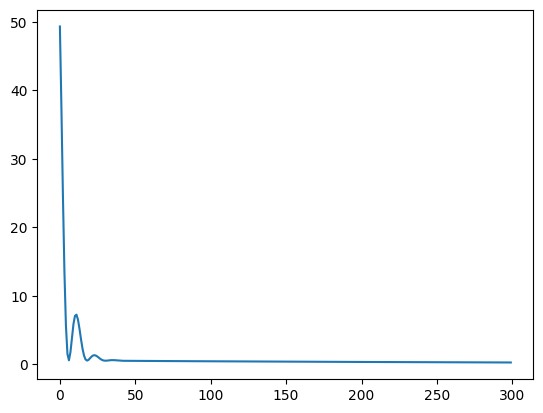

In [83]:
plt.plot(costList)
plt.show()

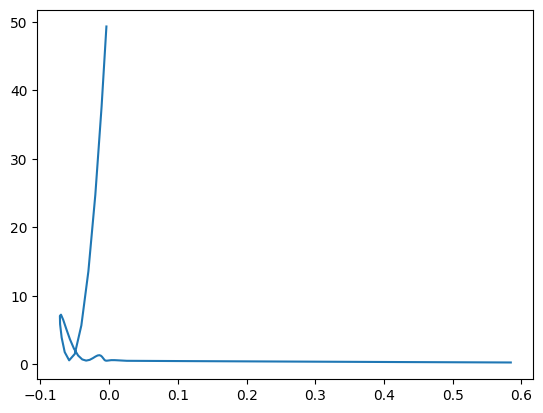

In [84]:
plt.plot(theta_0_lst,costList)
plt.show()

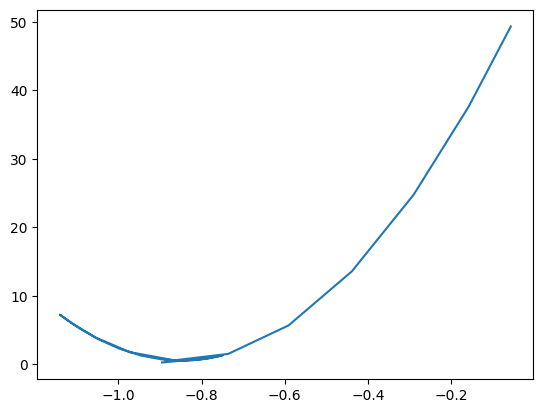

In [85]:
plt.plot(theta_1_lst,costList)
plt.show()

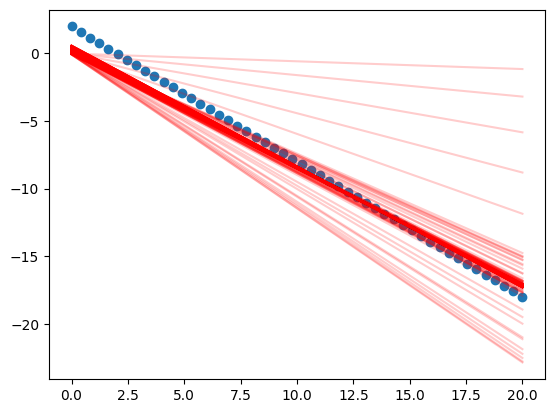

In [87]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

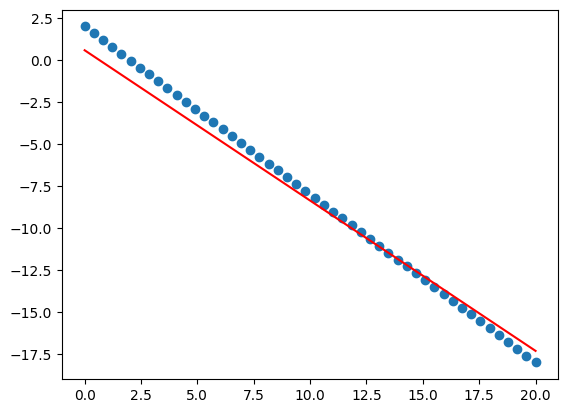

In [89]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [90]:
theta_0_lst, theta_1_lst, h, costList = NGD(X, y, 0.0005, 300, 0.89)

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm:
0.4371989711400588

theta_0_new : 0.2981858654934515
theta_1_new : -0.8734123554462966
v_0 : -0.0020008254673152346
v_1 : 0.00014883450367944167

****************** Iteration 172 ********************

h(x):
[  0.2999666   -0.05658231  -0.41313121  -0.76968012  -1.12622902
  -1.48277793  -1.83932683  -2.19587574  -2.55242464  -2.90897355
  -3.26552245  -3.62207136  -3.97862026  -4.33516917  -4.69171808
  -5.04826698  -5.40481589  -5.76136479  -6.1179137   -6.4744626
  -6.83101151  -7.18756041  -7.54410932  -7.90065822  -8.25720713
  -8.61375603  -8.97030494  -9.32685384  -9.68340275 -10.03995166
 -10.39650056 -10.75304947 -11.10959837 -11.46614728 -11.82269618
 -12.17924509 -12.53579399 -12.8923429  -13.2488918  -13.60544071
 -13.96198961 -14.31853852 -14.67508743 -15.03163633 -15.38818524
 -15.74473414 -16.10128305 -16.45783195 -16.81438086 -17.17092976]

Error Vector:
[-1.7000334  -1.64841904 -1.59680468 -1.5451

In [92]:
y_pred=theta_0_lst[-1]+ theta_1_lst[-1]*X
print(y_pred)

[  0.53582287   0.17211315  -0.19159657  -0.55530629  -0.919016
  -1.28272572  -1.64643544  -2.01014516  -2.37385488  -2.7375646
  -3.10127432  -3.46498404  -3.82869376  -4.19240348  -4.5561132
  -4.91982292  -5.28353264  -5.64724236  -6.01095208  -6.3746618
  -6.73837152  -7.10208124  -7.46579096  -7.82950068  -8.1932104
  -8.55692012  -8.92062984  -9.28433956  -9.64804928 -10.011759
 -10.37546872 -10.73917843 -11.10288815 -11.46659787 -11.83030759
 -12.19401731 -12.55772703 -12.92143675 -13.28514647 -13.64885619
 -14.01256591 -14.37627563 -14.73998535 -15.10369507 -15.46740479
 -15.83111451 -16.19482423 -16.55853395 -16.92224367 -17.28595339]


In [93]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9840836337110338

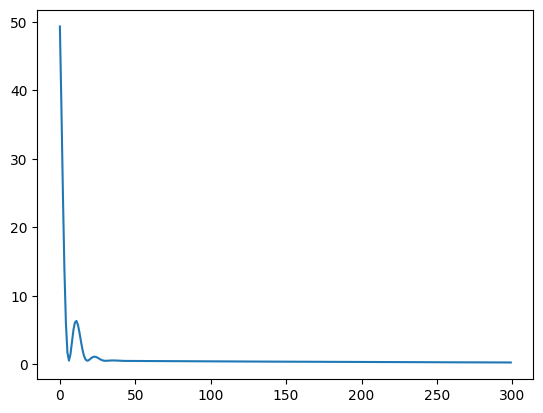

In [94]:
plt.plot(costList)
plt.show()

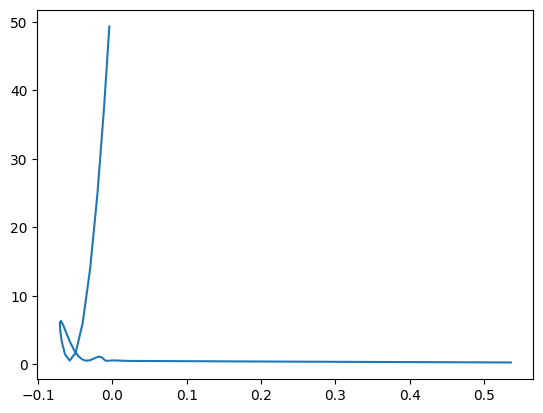

In [95]:
plt.plot(theta_0_lst,costList)
plt.show()

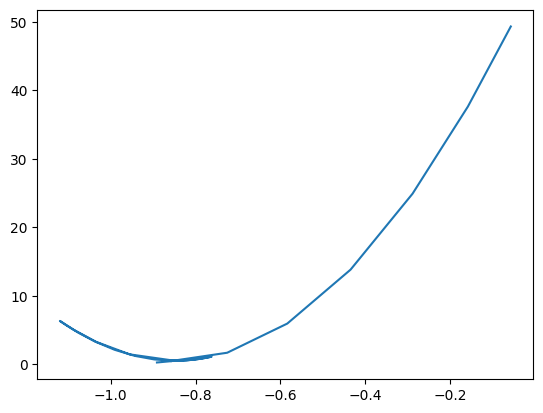

In [96]:
plt.plot(theta_1_lst,costList)
plt.show()

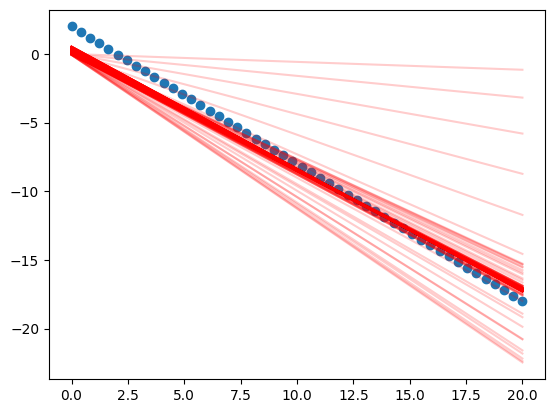

In [98]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)
plt.show()

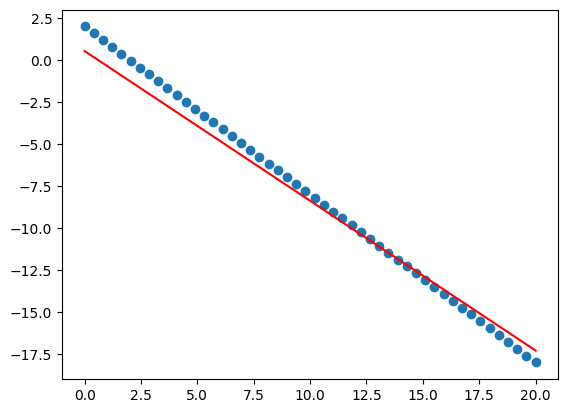

In [99]:
plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()